# 🏡 Boston House Price Prediction

### Project Overview
This project builds a regression model to predict the median value of owner-occupied homes in Boston.
The dataset contains 13 attributes including crime rate, number of rooms, and property age.

**Objective:** Develop a model with high accuracy (R² score) to estimate housing prices.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Visualization settings
sns.set()
%matplotlib inline
print("Models imported successfully")

Models imported successfully


## 1. Data Loading
The dataset is loaded from a CSV file. Since the original file has no headers and uses space separation, we define column names manually.

In [10]:
# 1. Define column names manually because the CSV file doesn't have a header
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

# 2. Load the CSV file
# 'sep=\s+' means the data is separated by spaces, not commas
house_price_df = pd.read_csv('Project-House-Price-File.csv', sep='\s+', header=None, names=column_names)

# 3. Peek at the data
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Data Inspection
This step analyzes the dataset structure to identify missing values and examine the statistical summary of the features (mean, standard deviation, and range).

In [23]:
#missing values (nulls) in every column
print("--- Missing Values Check ---")
print(house_price_df.isnull().sum())

#statistical summary
print("\n--- Statistical Summary ---")
print(house_price_df.describe())

--- Missing Values Check ---
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

--- Statistical Summary ---
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE

## 3. Exploratory Data Analysis (EDA)

### Correlation Analysis
This section visualizes the correlation matrix to understand the linear relationships between features. A heatmap is generated to identify strong positive or negative correlations with the target variable (`PRICE`).

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64


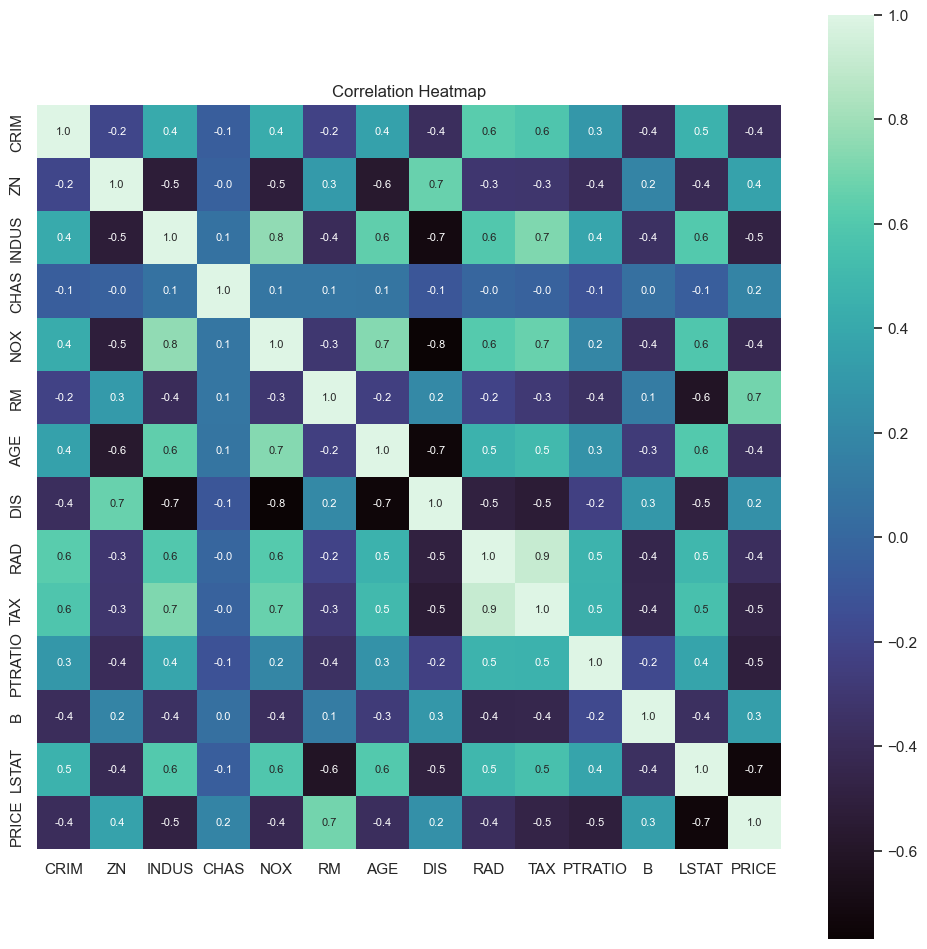

In [32]:
#Calculate the correlation matrix
correlation = house_price_df.corr()
#Check correlation with PRICE specifically
print(correlation['PRICE'].sort_values(ascending=False))

#heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

## 4. Data Preprocessing
This section prepares the dataset for model training. The data is split into features (`X`) and the target variable (`Y`). Subsequently, the dataset is divided into training and testing sets (80% training, 20% testing) to ensure impartial model evaluation.

In [33]:
#Separate Features and Target
X = house_price_df.drop(columns='PRICE', axis=1)
Y = house_price_df['PRICE']

#Split into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#shapes
print("Total Data Shape:", X.shape)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Total Data Shape: (506, 13)
Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)


## 5. Model Training & Evaluation
We employ a comparative approach by training three different regression models to identify the best performer:
1.  **Linear Regression** (Baseline)
2.  **Random Forest Regressor** (Ensemble)
3.  **XGBoost Regressor** (Gradient Boosting)

The models are evaluated based on **R-Squared (R²)** and **Mean Absolute Error (MAE)**.

In [34]:
#Initialize and Train
LR = LinearRegression()
LR.fit(X_train, Y_train)

#Predict
pred_LR = LR.predict(X_test)

#Evaluate
score_r2_LR = metrics.r2_score(Y_test, pred_LR)
score_mae_LR = metrics.mean_absolute_error(Y_test, pred_LR)

print("--- Linear Regression (LR) Results ---")
print(f"R-Squared Score: {score_r2_LR:.4f}")
print(f"Mean Absolute Error: {score_mae_LR:.4f}")

--- Linear Regression (LR) Results ---
R-Squared Score: 0.6688
Mean Absolute Error: 3.1891


### 5.2 Random Forest Regressor
Random Forest is an ensemble learning method that constructs multiple decision trees during training. It outputs the average prediction of the individual trees, which reduces overfitting and improves accuracy compared to a single decision tree.

In [35]:
#initialize the Model
# n_estimators=100 means we are building 100 decision trees
RF = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the Model
RF.fit(X_train, Y_train)

#Predict
pred_RF = RF.predict(X_test)

#Evaluate
score_r2_RF = metrics.r2_score(Y_test, pred_RF)
score_mae_RF = metrics.mean_absolute_error(Y_test, pred_RF)

print("--- Random Forest (RF) Results ---")
print(f"R-Squared Score: {score_r2_RF:.4f}")
print(f"Mean Absolute Error: {score_mae_RF:.4f}")

--- Random Forest (RF) Results ---
R-Squared Score: 0.8923
Mean Absolute Error: 2.0395


### 5.3 XGBoost Regressor
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting algorithms. Unlike Random Forest, which builds trees independently, XGBoost builds trees sequentially—each new tree attempts to correct the errors made by the previous one.

In [38]:
#Initialize the Model
XGB = XGBRegressor()

#Train the Model
XGB.fit(X_train, Y_train)

#Predict
pred_XGB = XGB.predict(X_test)

#Evaluate
score_r2_XGB = metrics.r2_score(Y_test, pred_XGB)
score_mae_XGB = metrics.mean_absolute_error(Y_test, pred_XGB)

print("--- XGBoost (XGB) Results ---")
print(f"R-Squared Score: {score_r2_XGB:.4f}")
print(f"Mean Absolute Error: {score_mae_XGB:.4f}")

--- XGBoost (XGB) Results ---
R-Squared Score: 0.9058
Mean Absolute Error: 1.8909


## 6. Visualization: Actual vs. Predicted Prices
This section visualizes the performance of the XGBoost model by mapping Actual Prices against Predicted Prices. A scatter plot is generated where data points aligning along the diagonal line indicate high prediction accuracy.

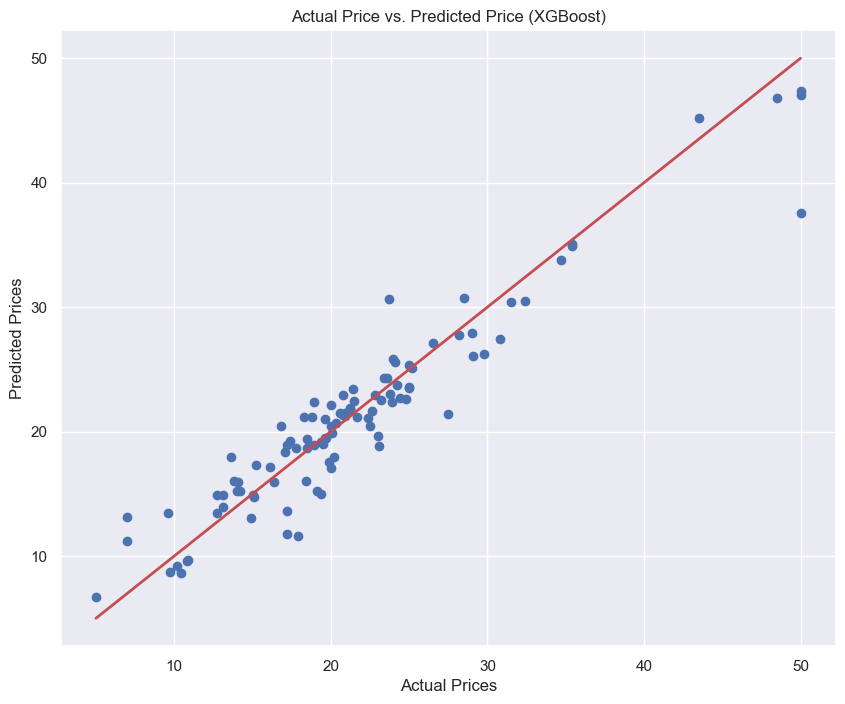

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, pred_XGB)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r-', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs. Predicted Price (XGBoost)")
plt.show()

## 7. Model Comparison & Final Selection
Three regression models were evaluated: Linear Regression, Random Forest, and XGBoost. The selection criteria were based on R-Squared (Accuracy) and Mean Absolute Error (MAE).

**Conclusion:**
* **Linear Regression:** Failed to capture non-linear patterns (R² ~ 0.66).
* **Random Forest:** Demonstrated significant improvement (R² ~ 0.89).
* **XGBoost:** Achieved the highest performance (R² ~ 0.90) with the lowest error rate.

Consequently, **XGBoost** is selected as the final model for deployment.

In [41]:
#DataFrame to compare results
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-Squared Score': [score_r2_LR, score_r2_RF, score_r2_XGB],
    'Mean Absolute Error': [score_mae_LR, score_mae_RF, score_mae_XGB]
})

#Sort by Score (High to Low)
print(models.sort_values(by='R-Squared Score', ascending=False))

               Model  R-Squared Score  Mean Absolute Error
2            XGBoost         0.905784             1.890887
1      Random Forest         0.892253             2.039539
0  Linear Regression         0.668759             3.189092


## 8. Saving the Trained Model
The final XGBoost model is serialized using the `pickle` library. This allows the model to be reloaded in a production environment (e.g., a Streamlit web application) without requiring retraining.

In [42]:
import pickle

# Save the trained XGBoost model to a file
filename = 'house_price_model.pkl'
pickle.dump(XGB, open(filename, 'wb'))

print("Model saved successfully as 'house_price_model.pkl'")

Model saved successfully as 'house_price_model.pkl'
